<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [34]:
student_number = '401102789'
first_name = 'Seyed Ali'
last_name = 'Vakilzadeh'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [2]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def characteristic_polynomial(M):
    a, b = M[0]
    c, d = M[1]
    coefficients = [1, -(a + d), a * d - b * c]
    return coefficients

def solve_poly_equation(coefficients):
    a = coefficients[0]
    b = coefficients[1]
    c = coefficients[2]

    delta = b**2 - 4 * a * c
    root1 = (-b + np.sqrt(delta)) / (2 * a)
    root2 = (-b - np.sqrt(delta)) / (2 * a)
    return [root1, root2]


def compute_eigenvalues(A):
    coeff = characteristic_polynomial(A)
    eigenvals = solve_poly_equation(coeff)
    return np.array(eigenvals)

def compute_eigenvector(A, eigenvalue):

    n = len(A)
    I = np.eye(n)
    AI = A - eigenvalue * I

    if AI[0, 0] != 0: #if the first indice wasnt zero
        eigenvector = np.array([-AI[0, 1], AI[0, 0]])
    else:
        eigenvector = np.array([-AI[1, 1], AI[1, 0]])

    return eigenvector


def compute_eigenvectors(A):
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = [compute_eigenvector(A, ev) for ev in eigenvalues]

    # Convert list of eigenvectors to numpy array
    eigenvectors = np.array(eigenvectors).T
    return eigenvectors



<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [4]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [5]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

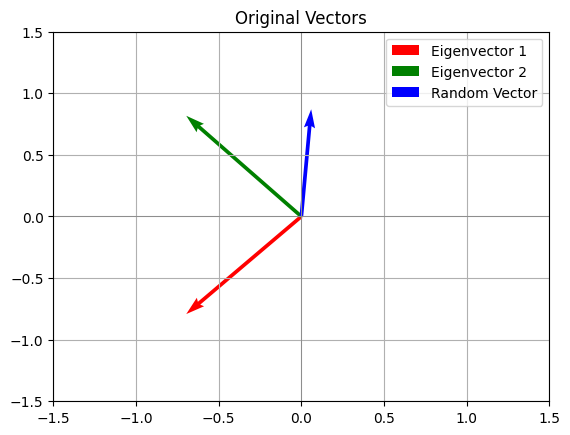

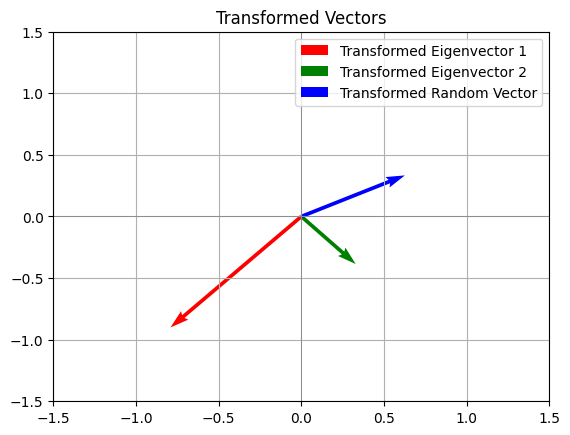

In [6]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

eigenvectors wont change directions (rasta) when transformed, but other regular vectors would

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [7]:
def diagonalize(A):
    """
    Diagonalizes the square matrix A if possible using eigenvectors.

    Args:
    - A (numpy.ndarray): The square matrix to be diagonalized.

    Returns:
    - diagonal_matrix (numpy.ndarray): The diagonal matrix D such that A = PDP^-1,
      where D is diagonal and P is the matrix of eigenvectors.
    """
    #eigenvalues and eigenvectors
    eigenvalues = compute_eigenvalues(A)
    P = compute_eigenvectors(A)

    # Create the diagonal matrix D from the eigenvalues
    D = np.zeros_like(A)
    np.fill_diagonal(D, eigenvalues) #diagonalize

    return D


to check your answer use the cells below

In [8]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [9]:
A = generate_valid_matrix()


# Construct the diagonal matrix D from the eigenvalues
D = diagonalize(A)


check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

powering the matrice A using property A=P D P_INV is faster and easier, since most of the terms P and P_INV cancel eachother out to identity in the midst of the series when they are next to eachother; thus only leaving us to powering D to n, which is also an easy task since it is a diagonal matrice.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [10]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [11]:
n_values = range(1, 200)

In [12]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [13]:
def compute_powers_your_way(A, n):
    """
    Computes the power of a square matrix A to the nth degree.

    Args:
    - A (numpy.ndarray): The square matrix for which powers are computed.
    - n (int): The exponent to which A is raised.

    Returns:
    - result (numpy.ndarray): The matrix A raised to the power of n.

    """
    eigenvectors = compute_eigenvectors(A)
    eigenvalues = compute_eigenvalues(A)

    P = eigenvectors

    # inverse of p
    P_inv = np.linalg.inv(P)

    D = diagonalize(A)

    # Raise the diagonal matrix D to the power n
    D = np.zeros_like(A)
    np.fill_diagonal(D, eigenvalues ** n)

    # Compute A^n = P D^n P^-1
    A_powered = P @ D @ P_inv

    return A_powered

In [14]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

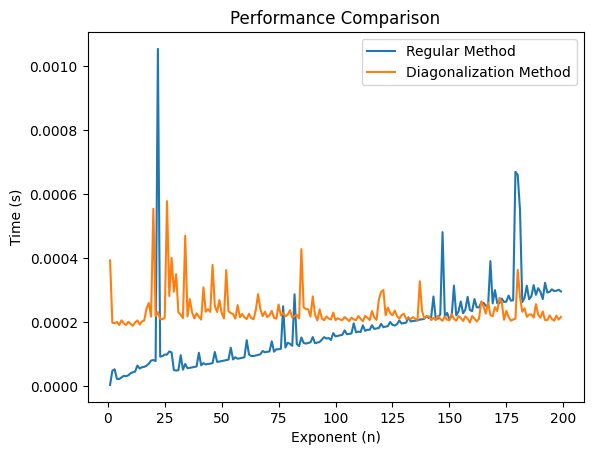

In [16]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [17]:

def gram_schmidt(A):
    # TODO: define Q and R matrices with correct dimensions
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    # TODO: complete the loop
    for i in range(n):
      v = A[:, i]
      for j in range(i):
        R[j, i] = np.dot(Q[:, j], A[:, i])
        v = v - R[j, i] * Q[:, j]
      R[i, i] = np.linalg.norm(v)
      Q[:, i] = v / R[i, i]


    # TODO: return Q and R matrices
    return Q, R


Now, let's check if the decompostion. No need to change the following cell.

In [18]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.20737386 0.6508826  0.43897233 0.78613485]
 [0.3738556  0.49095621 0.38642292 0.6932686 ]
 [0.89745255 0.67647404 0.08793439 0.28767137]
 [0.90185947 0.87796468 0.44638111 0.09883101]]

Orthogonal matrix Q:
[[ 0.15450112  0.89589488 -0.41452093 -0.04091655]
 [ 0.27853611  0.26599901  0.61039275  0.69215811]
 [ 0.66863502 -0.35400619 -0.55069691  0.35261842]
 [ 0.67191834  0.03600711  0.39028964 -0.62841327]]

Upper triangular matrix R:
[[ 1.3422159   1.27954593  0.53418212  0.57331258]
 [ 0.          0.50585323  0.48100476  0.79042412]
 [ 0.          0.          0.17969925 -0.02255024]
 [ 0.          0.          0.          0.48701706]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [19]:
def householder_reflection(a):
    norm_a = np.linalg.norm(a)

    # Create the unit vector e1:
    e1 = np.zeros_like(a)
    e1[0] = 1.0

    # Compute the vector v in the equation
    v = a + np.sign(a[0]) * norm_a * e1
    v = v / np.linalg.norm(v)

    #Householder matrix:
    H = np.eye(a.shape[0]) - 2 * np.outer(v, v)
    return H


def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        # Extract the vector to reflect
        x = R[i:, i]

        # Create the Householder reflection matrix for column i
        H_i = np.eye(m)
        H = householder_reflection(x)
        H_i[i:, i:] = H

        # Apply the Householder transformation to R
        R = np.dot(H_i, R)

        # Accumulate the transformations in Q
        Q = np.dot(Q, H_i.T)

    return Q, R


Now, let's check if the decompostion.


In [20]:
test_QR_decomposition()

Matrix A:
[[0.65138921 0.69262873 0.06405186 0.91396044]
 [0.50198343 0.82491045 0.92291993 0.51156412]
 [0.10501841 0.90528116 0.17342638 0.96349978]
 [0.12991294 0.91513384 0.45526444 0.36635161]]

Orthogonal matrix Q:
[[ 0.77623297 -0.2833958  -0.54290429 -0.14968006]
 [ 0.59819242  0.05154886  0.75864393  0.25291883]
 [ 0.12514599  0.6901293  -0.35217067  0.61970625]
 [ 0.15481176  0.66389086  0.07543299 -0.72773079]]

Upper triangular matrix R:
[[ 0.83916714  1.28606223  0.69398678  1.19275369]
 [ 0.          1.07854517  0.45135597  0.67551492]
 [ 0.          0.          0.63865985 -0.4197794 ]
 [ 0.          0.          0.          0.32306404]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [31]:
def qr_algorithm(A, num_iterations=100000, tol=1e-10):
    #copying A matrix
    n = A.shape[0]
    A_copy = np.copy(A)
    Q_total = np.eye(n) #will be updated in each recursion, initialized for now

    for _ in range(num_iterations):
        #getting closer to final answer in this iteration step
        Q, R = np.linalg.qr(A_copy)
        A_copy = np.dot(R, Q)
        Q_total = np.dot(Q_total, Q)

        #checking if the distance to the answer is small enough
        off_diag_max = np.max(np.abs(A_copy - np.diag(np.diagonal(A_copy))))
        if off_diag_max < tol:
            break
    #returning e_vals and Q_tot when converged
    eigenvalues = np.diagonal(A_copy)
    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    n = A.shape[0]
    eigenvectors = np.zeros((n, n), dtype=np.float64)

    for i, eigenvalue in enumerate(eigenvalues):
        B = A - eigenvalue * np.eye(n)
        U, s, Vt = np.linalg.svd(B)
        eigenvector = Vt[-1]
        eigenvectors[:, i] = eigenvector

    return eigenvectors


Let's verify our results. no need to change the following cell.

In [33]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.02433394 0.19857284 0.31773449 0.66885519]
 [0.16219028 0.56563705 0.92442308 0.01311903]
 [0.35550953 0.37422198 0.59890052 0.60105775]
 [0.9225989  0.03093387 0.91881436 0.52466981]]

Eigenvalues (QR Algorithm):
[ 1.86086811 -0.64211079  0.62066518 -0.12588119]

Eigenvectors (QR Algorithm):
[[-0.3677983  -0.65393222  0.16238074  0.56332264]
 [-0.43166645  0.24658144 -0.87582309  0.61054798]
 [-0.53135666 -0.21709471 -0.08695573 -0.55493117]
 [-0.62932391  0.68149845  0.44609988 -0.04416062]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 1.86086811  0.62066518 -0.64211079 -0.12588119]

Eigenvectors (NumPy):
[[ 0.3677983   0.16238074 -0.65393222 -0.56332264]
 [ 0.43166645 -0.87582309  0.24658144 -0.61054798]
 [ 0.53135666 -0.08695573 -0.21709471  0.55493117]
 [ 0.62932391  0.44609988  0.68149845  0.04416062]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
